# One-Dimensional Acoustic (Scalar) Wave Equation with Cubic Damping

<b>Goal/wish/endavor/motivation</b> Our goal here is to construct an example that shows the application of the Newton harmonic balance method applied to PDE (after spatial discretization). We wish to avoid the complexity of the shallow water equations (numerics and interpretation of solutions) in a first instance. We wish to construct an example that is sufficiently simple while at the same time conserving some of the complexity of the full problem. We consider an acoustic wave propagation problem with a non-linear damping term. The one-dimensional shallow water equations can indeed be reformulated as a scalar wave equation. The non-linear damping brings the problem in reach without to many complications. 
 
<b>Non-Linear Problem to solve</b> Let $x \in \Omega=(0,1)$ denote the spatial domain. Let $t \in [0,T]$ denote the time interval. Let $c$ denote the velocity of wave propagation. Let $\gamma \geq 0$ and $\gamma_3 \geq 0 $ denote the linear friction and cubic friction coefficient, respectively. Let $f(x,t)$ denote the forcing. The partial differential equation for the unknown $u(x,t)$ we intend to solve can be written as 

$$
\frac{\partial^2 \, u}{\partial t^2} 
+ \gamma \frac{\partial \, u}{\partial t} 
+ \gamma_3 \left( \frac{\partial \, u}{\partial t} \right)^3 
= c^2 \frac{\partial^2 \, u}{\partial x^2} + f(x,t) 
$$ 

(observe the plus sign in front of $\gamma$ and square of propagation speed). The non-linear term $\gamma_3 \left( \frac{\partial \, u}{\partial t} \right)^3$ in an ideal representation of the bed friction. We assume that the forcing $f(x,t)$ varries in space with $F_0(x)$ and sinusoidally in time with a driving frequency $\omega_d$. We can thus write 

$$
f(x,t) = F_0(x) \, \sin(\omega_d \, t) \, .
$$

(Not sure yet how $F_0(x)$ should be choosen. Plane wave vs. traveling wave model). For simplicity, we supply homogeneous Dirichlet conditions at both sides of $\Omega$, i.e., we impose that 

$$
u(0,t) = 0 \text{ and }  u(1,t) = 0\, . 
$$

We impose non-zero initial conditions for $u(x,t)$ and zero initial conditions for $\dot{u}(x,t)$, i.e., we impose that

$$
u(x,0) = u_0(x) \text{ and } \dot{u}(x,0) = 0 \, . 
$$

<b>Reference Solutions</b> 
1. in the linear case, separation of variables (implemented using e.g. the function [pde_separate](https://docs.sympy.org/latest/modules/solvers/pde.html) in the sympy package, using e.g. sympy) or using the method of manufactured solutions (we fail to provide provide references here). 
1. in the non-linear, further increases in amplitude. Appearance of higher order harmonics. 

<b>Two Solution Methods</b> We wish to compare two solution methods:  
1. first method is method of lines (spatial discretization followed by time integration): see 
1. second method is Newton Harmonic Balance method; 

<b>Spatial Discretization</b> We use the second order central finite difference method on an uniform mesh with $N+1$ nodes (including both boundary nodes) for the diffusion term. We refer to the [EE4375 course](https://github.com/ziolai/finite_element_electrical_engineering) for details.

<b>Temporal Discretization</b> After spatial discretization, the following system of second order ordinary differential equations is obtained 

$$
\ddot{\mathbf{u}}(t) = \mathbf{F}(\mathbf{u},\dot{\mathbf{u}}, t) \in {\mathbb R}^{N+1}
$$ 

where $\mathbf{F}(\mathbf{u},t)$ contains both linear and non-linear terms. This systems is supplied with initial conditions for both $\mathbf{u}(t=0)$ and $\dot{\mathbf{u}}(t=0)$. This system of ordinary differential eqautions can be solved using time-integration. We use SecondOrderProblems in DifferentialEquations.jl (velocity vector immeiately avaialable). 

<b>Two Variatiants of the Harmonic Balance Method</b> 
1. first variant: first discretize in space. Then apply the harmonic balance method to the resulting system of coupled system of ordinary differential equations; 
2. second variant: first apply the harmonic balance method. Then discretize in space to arrive at coupled system of (ordinary or partial) differential equations. In one spatial dimension, this leads to a system coupled ordinary differential equations can be conviently solved using a shooting method.  

<b>Second Variant of the Harmonic Balance Solution</b> We assume a single harmonic anzats with spatial amplitudes $A(x)$ and $B(x)$ and driving frequency $\omega_d$. The harmonic balance anzats $u^{hb}(x,t)$ is thus of the form (reduces to method of undetermined coefficients in case that $\gamma_3 = 0$. Average zero, thus constant term. No term with $\cos(\omega_d \, t)$ in case of no damping).  

$$
u^{hb}(x,t) = A_c(x) \, \cos(\omega_d \, t) + B_s(x) \, \sin(\omega_d \, t) \, . 
$$

We assume that the initial conditions do not influence the solution $u^{hb}(x,t)$. Although the problem is non-linear, we assume superposition and thus that both the cos and sin amplitude $A(x)$ and $B(x)$ satisfy the homogeneous Dirichlet boundary conditions. The velocity is then given by 

$$
\dot{u}^{hb}(x,t) = - \omega_d \, A_c(x) \, \sin(\omega_d \, t) + \omega_d \, B_s(x) \, \cos(\omega_d \, t) \, .  
$$

The non-linear term $\gamma_3 \left( \frac{\partial \, u^{hb}}{\partial t} \right)^3$ is given up to first harmonics given by

$$
\gamma_3 \left( \frac{\partial \, u^{hb}}{\partial t} \right)^3 = 
\gamma_3 \, \omega^3_d \, [ 0.75 \, B_s(x)^3 + 1.5 \, A_c(x)^2 \, B_s(x) ]    \, \cos(\omega_d \, t) + 
\gamma_3 \, \omega^3_d \, [ - 0.75 \, A_c(x)^3 - 1.5 \, A_c(x) \, B_s(x)^2 ]  \, \sin(\omega_d \, t)
$$

(observe the factor $\omega_d^3$. See seperate notebook on [symbolic computations using Symbolics.jl](./symbolic_julia.ipynb)). 

<b>Coupled Non-Linear Helmholtz Equation for Mode Amplitudes</b>

Substituting the above expressoion for the non-linear term into the wave equation, we obtain the two following coupled (so-called Helmholtz) equations for $A_c(x)$ and $B_s(x)$ 

$$
c^2 \, A_c''(x) + \omega_d^2 \, A_c + \gamma \, \omega_d \, B_s(x) + 
\gamma_3 \, \omega^3 \, [ 0.75 \, B_s(x)^3 + 1.5 \, A_c(x)^2 \, B_s(x) ] = 0 
$$ 

and 

$$
c^2 \, B_s''(x) + \omega_d^2 \, B_s - \gamma \, \omega_d \, A_c(x) - 
\gamma_3 \, \omega^3 \, [ 0.75 \, A_c(x)^3 + 1.5 \, A_c(x) \, B_s(x)^2 ]= F_0(x)
$$ 

(similar equations have been studied in literature. See, e.g., Mandel-Scheider-2020) (Literature on similar models would be valuable to see here). Boundary value problem for two coupled ODE supplied with Dirichlet boundary conditions on both sides. This problem can be solved using a shooting method implemented in the function solve_bvp(). Alternatively, the problem can be discretized in space (using a finite difference method on a uniform mesh). The resulting non-linear system can be solved using either a Newton or continuation method.    

<b>Case Studies</b>
1. Case (1/3): <b> Undamped ($\gamma = 0$) Linear ($\gamma_3 = 0$) Model</b> Reference solution for the next step. Based on the analogy of the mass-spring-damper model, expect resonant modes. Expect to obtain $A_c(x) = 0$ and $B_s(x)$ with largest amplitude. Homogeneous part of the solution does not drop off. Expect solution to be incomplete without homogeneous part of the solution. 

1. Case (2/3): <b> Damped ($\gamma \neq 0$) Linear ($\gamma_3 = 0$) Model</b> Reference solution for the next step. Based on the analogy of the mass-spring-damper model, expect amplitude of $A_c(x)$ to increase and the amplitude $B_s(x)$ to decrease as the linear damping coefficient $\gamma$ is increased. 

1. Case (3/3): <b> Non-Linear ($\gamma_3 \neq 0$) Model</b> Homogeneous part of the solution dies out due to damping. Solution due to forcing emerges. This solution is expected to consist of multiple harmonics. 

<b>Comparison with Time-Integration Followed by FFT Analysis</b>

<b>Comparison with Experimental Data</b> Verify model using data from music instruments? 

<b>To do</b> 
1. perform a spectral analysis of the $AA$ matrix; 
1. explain stronger gradients near the edges of the domain even in the case of linear damping possibly by solving the problem symbolically. Maybe no closed from solutions exist.) - <i>skin effect</i> like;
1. cite literature on cubic damping;
2. add a transport term to the equation; 

## Import Packages

In [151]:
using LinearAlgebra
using BoundaryValueDiffEq
using SparseArrays
using Plots
using BenchmarkTools 

## Section 1: Introduction 

More later. 

## Section 2: Case (1/3): Undamped ($\gamma=0$) Linear ($\gamma_3=0$) Single Helmholtz Equation

In the absence of both linear and non-linear damping, the harmonic balance solution reduces to $u^{hb}(x,t) = B_s(x) \, \sin(\omega_d \, t)$. Only the amplitude $B_s(x)$ remains to be determined. Here we solve for $x \in \Omega = (0,1)$ 

$$
c^2 \, B_s''(x) + \omega_d^2 \, B_s = F_0(x)
$$ 

supplied with the boundary homogeneous Dirichlet boundary conditions 

$$
B_s(x=0) = 0 \text{ and } B_s(x=1) = 0 \, . 
$$

Having solved for $B_s(x)$, the harmonic balance solution $u^{hb}(x,t)$ can be visualized in space and time. 

Observe that 
1. the function $B_s(x)$ oscillates at higher frequency on $\Omega$ as the driving angular frequency $\omega_d$ increases; 
1. the largest value of the function $B_s(x)$ is large for the driving frequency close to a natural (eigen) frequency of the problem (remains to be shown in code); 

To do: 
1. place simulation in loop over driving frequency. Expect peaks at resonant frequencies. Note that absence of damping present computing the frequency response using BifurcationKit.jl; 
2. solve using a finite difference solver to increase confidence in results; 

### Section 1.2: Auxiliary Functions 

In [131]:
# set source function 
src(x) = 1000. # obtain u(x) > 1 for [u(x)}^3 to be large in size 

# set right-hand side 
# u''(x) = - f(x) reformulated as 
# coupled first order system as 
# u'(x) = v(x) and v'(x) = - f(x) or 
# du[1] = u[2] and du[2] = - f(x) 
function rhs!(du, u, p, x)
    c, omd = p
    B = u[1]; dB = u[2]
    du[1] = dB
    du[2] = -omd^2/c^2*B - src(x)/c 
end

# set boundary conditions 
# boundary conditions on the left and right of computational domain 
# requires explaining syntax 
function bc(residual, u, p, x)
    uleft = 0; uright=0; 
    residual[1] = u[1][1] - uleft 
    residual[2] = u[end][1] - uright
end

bc (generic function with 1 method)

### Section 2.2: Set Parameters and Solve  

In [132]:
# set constants 
c = 1.
gamma = 1. 
gamma3 = 0  
omd = 10.
p = [c, omd]

omdstep = 1. 
omdvec  = 0.:omdstep:10. |> collect 

# set domain size 
xspan = (0.,1.)

# set initial guess 
start = [0., 0.]

# store parameter value in p  
p = [c, omd]
    
# define and solve the problem 
bvp = BVProblem(rhs!, bc, start, xspan,p)
sol = solve(bvp, MIRK4(), dt = 0.005);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


### Section 3.2: Post-Processing   

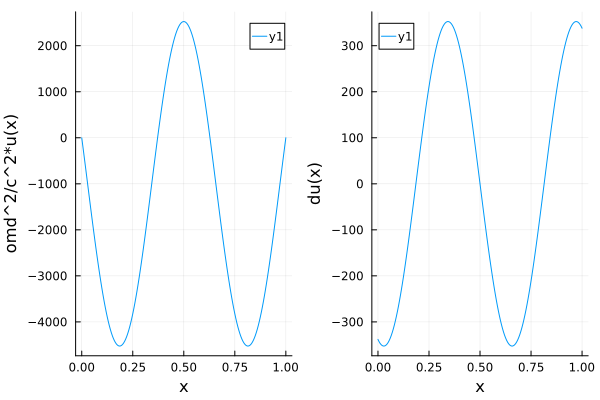

In [112]:
# plot u(x) and du/dx(x)
myB  = [u[1] for u in sol.u]
mydB = [u[2] for u in sol.u]
p1 = plot(sol.t, omd^2/c^2*myB, xlabel="x", ylabel = "omd^2/c^2*u(x)") 
p2 = plot(sol.t, mydB, xlabel="x", ylabel = "du(x)") 
plot(p1,p2,layout=(1,2))

### Section 4.2: Plot solution in space-time domain 

Construct solution in time domain by outer product of two vectors, one in space, the other in time. 

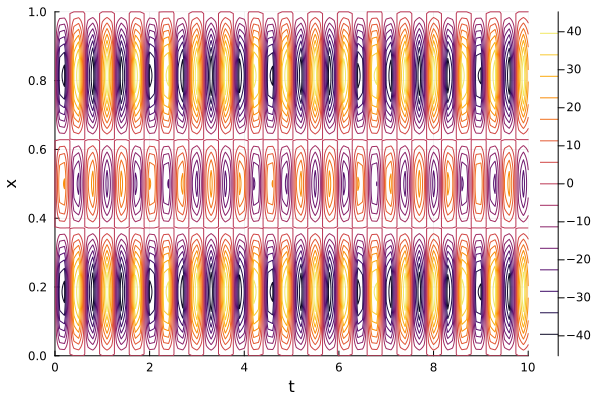

In [113]:
tend = 10; tstep = 0.1; 
tvec = 0:tstep:tend |> collect
usint = sin.(omd*tvec)
U = myB*usint'
contour(tvec,sol.t,U,xlabel="t",ylabel="x")

## Section 3: Case (2/3):  Damped ($\gamma\neq0$) Linear ($\gamma_3=0$) Pair of Helmholtz Equation

In the presence of damping, the harmonic balance solution is written as $u^{hb}(x,t) = A_c(x) \, \cos(\omega_d \, t) + B_s(x) \, \sin(\omega_d \, t)$. In the absence of non-linear damping, the coupled equation for the amplitudes $A_c(x)$ and $B_s(x)$ for $x \in \Omega = (0,1)$ can be written as 

$$
c^2 \, A_c''(x) + \omega_d^2 \, A_c + \gamma \, \omega_d \, B_s(x) = 0 
$$ 

and 

$$
c^2 \, B_s''(x) + \omega_d^2 \, B_s - \gamma \, \omega_d \, A_c(x) = F_0(x)
$$ 

supplied with the boundary homogeneous Dirichlet boundary conditions for both $A_c(x)$ and $B_s(x)$

$$
A_c(x=0) = 0 \text{ and } A_c(x=1) = 0 \text{ and } 
B_s(x=0) = 0 \text{ and } B_s(x=1) = 0 \, . 
$$

Observe that 
1. in case that $\gamma = 0$, we have that $A_c(x) = 0$; 
1. the amplitude of $A_c(x)$ ($B_s(x)$) to increase (decrease) as the damping parameter is increased; 
1. stronger gradients develop at the boundaries of the domain (likely due the Dirichlet boundary conditions employed) 

### Section 1.3: Auxilary Functions 

In [135]:
# set source function 
src(x) = 1000. # obtain u(x) > 1 for [u(x)}^3 to be large in size to be important in the non-linearity 

# set right-hand side 
function rhs!(du, u, p, x)
    c, gamma, gamma3, omd = p 
    A = u[1]; dA = u[2]; B = u[3]; dB = u[4]; 
    du[1] = dA
    du[2] = -omd^2/c^2*A + gamma*omd/c^2*B
    du[3] = dB
    du[4] = -omd^2/c^2*B - gamma*omd/c^2*A - src(x)/c^2 
end

# set boundary conditions 
# boundary conditions on the left and right of computational domain 
# requires explaining syntax 
function bc(residual, u, p, x)
    Aleft = 0; Aright=0; 
    Bleft = 0; Bright=0; 
    residual[1] = u[1][1] - Aleft 
    residual[2] = u[end][1] - Aright
    residual[3] = u[1][3] - Bleft 
    residual[4] = u[end][3] - Bright
end

bc (generic function with 1 method)

### Section 2.3: Set Parameters and Solve

In [136]:
# set constants 
c = 1.
gamma = 10  
gamma3 = 0  
omd = 10
p = [c, gamma, gamma3, omd]

omdstep = 1. 
omdvec  = 0.:omdstep:10. |> collect 

# set domain size 
xspan = (0.,1.)

# set initial guess 
start = [0., 0., 0., 0.]

# store parameter value in p  
p = [c, gamma, gamma3, omd]
    
# define and solve the problem 
bvp = BVProblem(rhs!, bc, start, xspan,p)
sol = solve(bvp, MIRK4(), dt = 0.005);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


### Section 3.3: Post-processing

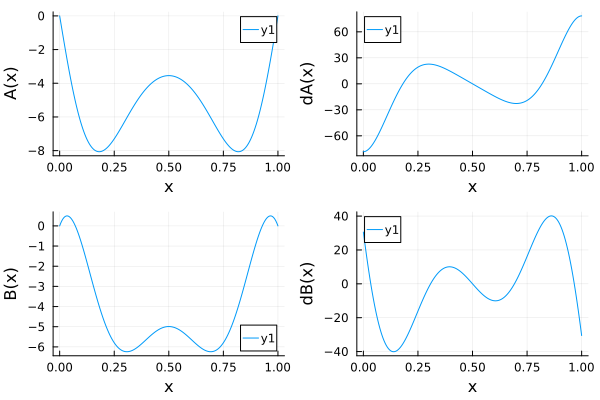

In [137]:
# plot u(x) and du/dx(x)
myA  = [u[1] for u in sol.u]
mydA = [u[2] for u in sol.u]
myB  = [u[3] for u in sol.u]
mydB = [u[4] for u in sol.u]
p1 = plot(sol.t, myA, xlabel="x", ylabel = "A(x)") 
p2 = plot(sol.t, mydA, xlabel="x", ylabel = "dA(x)") 
p3 = plot(sol.t, myB, xlabel="x", ylabel = "B(x)") 
p4 = plot(sol.t, mydB, xlabel="x", ylabel = "dB(x)")
plot(p1,p2,p3,p4,layout=(2,2))

### Section 4.3:  Plot solution in space-time domain 

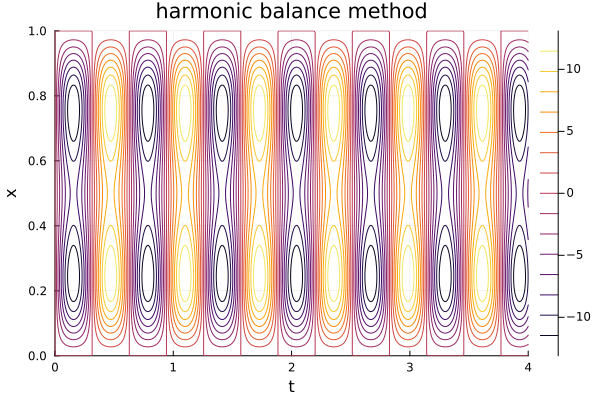

In [141]:
tend = 4; tstep = 0.01; 
tvec = 0:tstep:tend |> collect
ucost = sin.(omd*tvec); usint = sin.(omd*tvec)
U = myA*ucost' + myB*usint'
contour(tvec,sol.t,U,xlabel="t",ylabel="x",title="harmonic balance method")

### Section 5.3: Comparison with Transient Solution 
Here we compare with transient time stepping. See [notebook on 1D scalar wave equations](./scalar-wave-equation.ipynb). 

Observe: 
1. a number of periods is required to reach steady-state;
1. the amplitude of the transient solution decreases over time;
1. even though a large number of time-periods is simulated, the effect of the boundary conditions imposed remains visible;   

<div>
<img src="./nonlin-scalar-wave-case2of3-transient.png" width=600 /> 
</div>

<div>
<img src="./nonlin-scalar-wave-case2of3-transient-zoom.png" width=600 /> 
</div>

## Section 4: Case (3/3): Pair of Non-Linearly Damped Helmholtz Equations

(requires checking the signs again)

Most general case: 

$$
c^2 \, A_c''(x) + \omega_d^2 \, A_c + \gamma \, \omega_d \, B_s(x) + 
\gamma_3 \, \omega^3 \, [ 0.75 \, B_s(x)^3 + 1.5 \, A_c(x)^2 \, B_s(x) ] = 0 
$$ 

and 

$$
c^2 \, B_s''(x) + \omega_d^2 \, B_s - \gamma \, \omega_d \, A_c(x) -  
\gamma_3 \, \omega^3 \, [ 0.75 \, A_c(x)^3 + 1.5 \, A_c(x) \, B_s(x)^2 ]= F_0(x)
$$ 

supplied with the boundary homogeneous Dirichlet boundary conditions for both $A_c(x)$ and $B_s(x)$

$$
A_c(x=0) = 0 \text{ and } A_c(x=1) = 0 \text{ and } 
B_s(x=0) = 0 \text{ and } B_s(x=1) = 0 \, . 
$$

Observe that 
1. damping increases further (due to globally a larger damping coefficient);
1. larger damping causes the solution in the interior of the domain to reach a constant value;
1. sign in front of non-linear terms clearly have their importance; 

In [146]:
# set source function 
src(x) = 1000. # obtain u(x) > 1 for [u(x)}^3 to be large in size to be important in the non-linearity 

# set right-hand side 
function rhs!(du, u, p, x)
    c, gamma, gamma3, omd = p 
    A = u[1]; dA = u[2]; B = u[3]; dB = u[4]; 
    du[1] = dA
    # du[2] = -omd^2/c^2*A + gamma*omd/c^2*B - gamma3*(omd^3/c^2)*(0.75*B.^3 + 1.5*(A.^2).*B)
    du[2] = -omd^2/c^2*A + gamma*omd/c^2*B + gamma3*(omd^3/c^2)*(0.75*B.^3 + 1.5*(A.^2).*B)
    du[3] = dB
    du[4] = -omd^2/c^2*B - gamma*omd/c^2*A - gamma3*(omd^3/c^2)*(0.75*A.^3 + 1.5*(B.^2).*A) - src(x)/c^2 
end

# set boundary conditions 
# boundary conditions on the left and right of computational domain 
# requires explaining syntax 
function bc(residual, u, p, x)
    Aleft = 0; Aright=0; 
    Bleft = 0; Bright=0; 
    residual[1] = u[1][1] - Aleft 
    residual[2] = u[end][1] - Aright
    residual[3] = u[1][3] - Bleft 
    residual[4] = u[end][3] - Bright
end

bc (generic function with 1 method)

In [147]:
# set constants 
c = 1.
gamma = 0 # 10. 
gamma3 = 10. 
omd = 10
p = [c, gamma, gamma3, omd]

omdstep = 1. 
omdvec  = 0.:omdstep:10. |> collect 

# set domain size 
xspan = (0.,1.)

# set initial guess 
start = [0., 0., 0., 0.]

# store parameter value in p  
p = [c, gamma, gamma3, omd]
    
# define and solve the problem 
bvp = BVProblem(rhs!, bc, start, xspan,p)
sol = solve(bvp, MIRK4(), dt = 0.005);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


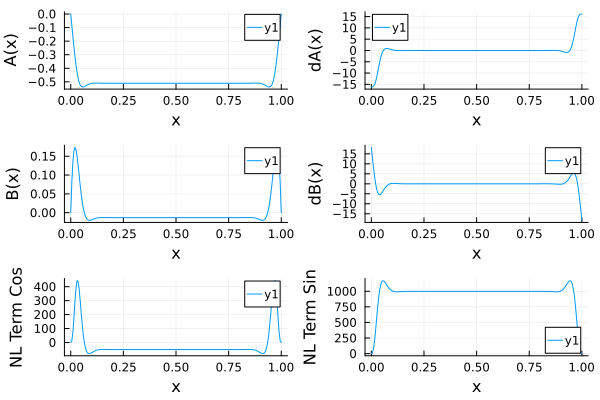

In [148]:
# plot u(x) and du/dx(x)
myA  = [u[1] for u in sol.u]
mydA = [u[2] for u in sol.u]
myB  = [u[3] for u in sol.u]
mydB = [u[4] for u in sol.u]
p1 = plot(sol.t, myA, xlabel="x", ylabel = "A(x)") 
p2 = plot(sol.t, mydA, xlabel="x", ylabel = "dA(x)") 
p3 = plot(sol.t, myB, xlabel="x", ylabel = "B(x)") 
p4 = plot(sol.t, mydB, xlabel="x", ylabel = "dB(x)")
p5 = plot(sol.t,   gamma3*(omd^3/c^2)*(0.75*myB.^3 + 1.5*(myA.^2).*myB), xlabel="x", ylabel = "NL Term Cos")
p6 = plot(sol.t, - gamma3*(omd^3/c^2)*(0.75*myA.^3 + 1.5*(myB.^2).*myA), xlabel="x", ylabel = "NL Term Sin")
plot(p1,p2,p3,p4,p5,p6,layout=(3,2))

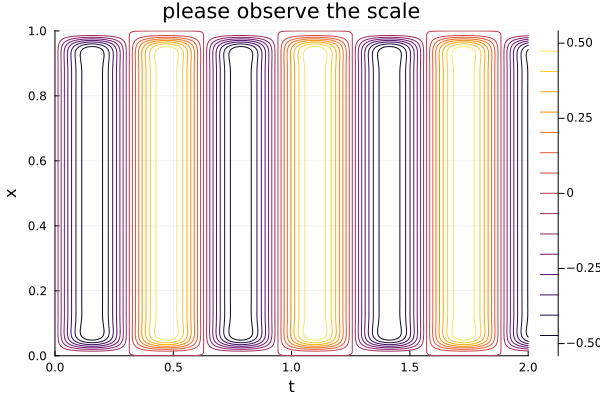

In [150]:
tend = 2; tstep = 0.01; 
tvec = 0:tstep:tend |> collect
ucost = sin.(omd*tvec); usint = sin.(omd*tvec)
U = myA*ucost' + myB*usint'
contour(tvec,sol.t,U,xlabel="t",ylabel="x", title="please observe the scale")

### Section 5.3: Comparison with Transient Solution

<div>
<img src="./nonlin-scalar-wave-case3of3-transient.png" width=600 /> 
</div>

<div>
<img src="./nonlin-scalar-wave-case3of3-transient-zoom.png" width=600 /> 
</div>